# Topic modelling

## Author: Kiana Kheiri 
### 23 February 2022

In [ ]:
import warnings
warnings.filterwarnings("ignore")

## Importing Libraries:

In [ ]:
from glob import glob
import glob
import pandas as pd
import os
import os.path
import pathlib 
import re

import requests 
import string
import matplotlib.pyplot as plt
import sklearn
import seaborn as sns
import spacy
from scispacy.abbreviation import  AbbreviationDetector
from textblob import TextBlob, Word
from string import punctuation
import re
from nltk.stem import PorterStemmer, WordNetLemmatizer
from nltk.stem.lancaster import LancasterStemmer
from stop_words import get_stop_words
from nltk.corpus import stopwords, webtext
import string
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter
from nltk.util import ngrams
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
import contractions
import keras

##  Putting All Files in a list and At least Making a Data Frame

In [ ]:
files=[]
fi=[]
os.chdir("/Users/user/Downloads/UseCaseData")
for file in glob.glob("**/*.txt"):
    print(file)
    fi.append(pathlib.PurePosixPath(file).stem)
    with open(file) as inf:
        files.append(inf.read())
df= pd.DataFrame(files)
##Adding Name of files to Data Frame
df = df.rename(columns = {0: "Article"},)
df
print(fi)
df1=df.assign(ID = fi)
df1

mllpi/mllpi_doc4.txt
mllpi/mllpi_doc5.txt
mllpi/mllpi_doc2.txt
mllpi/mllpi_doc3.txt
mllpi/mllpi_doc1.txt
transcend/trans_doc2.txt
transcend/trans_doc3.txt
transcend/trans_doc1.txt
hth/hth_doc4.txt
hth/hth_doc5.txt
hth/hth_doc7.txt
hth/hth_doc6.txt
hth/hth_doc2.txt
hth/hth_doc3.txt
hth/hth_doc1.txt
['mllpi_doc4', 'mllpi_doc5', 'mllpi_doc2', 'mllpi_doc3', 'mllpi_doc1', 'trans_doc2', 'trans_doc3', 'trans_doc1', 'hth_doc4', 'hth_doc5', 'hth_doc7', 'hth_doc6', 'hth_doc2', 'hth_doc3', 'hth_doc1']


,Article,ID
0,Council of Chief State School Officers\nOne Ma...,mllpi_doc4
1,Improving Education for Multilingual and Engli...,mllpi_doc5
2,English Learners in STEM Subjects:Transforming...,mllpi_doc2
3,Promoting English Learner Students’ Access to ...,mllpi_doc3
4,The shift to remote learning in U.S. K-12 publ...,mllpi_doc1
5,"\nIntroduction\nAt Transcend, we believe learn...",trans_doc2
6,Which Topics Matter Most to Your Target Audien...,trans_doc3
7,1\nConversations with Kids:\nWalking the road ...,trans_doc1
8,"How do we create meaningful, equitable, deeper...",hth_doc4
9,In this first-ever retrospective issue of the ...,hth_doc5


## Spliting mllpi trans hth Articles by Sentences

In [ ]:
def make_sent(text):
    article = [word for sentence in text.values for word in sentence.split() if re.match("^[a-zA-Z_-]*$", word) or '.' in word or "'" in word or '"' in word]
    article = ' '.join(article)
    sentences = article.split('.')
    sentences = [sentence for sentence in sentences if len(sentence)>1 and sentence != '']
    return sentences 
def df_sent(text):
    lst=(make_sent(text))
    sent_df = pd.DataFrame(lst) 
    sent_df = sent_df.rename(columns = {0: "Sentences"},)
    initial_value = 1
    sent_df['ID'] = range(initial_value, len(sent_df) +initial_value)
    return sent_df


# Data PreProcessing
## 1. extend the abbreviations

In [ ]:
df1.describe()
df1.isnull().sum().sort_values(ascending=False)
nlp= spacy.load("en_core_web_sm")
abbreviation_pipe = AbbreviationDetector(nlp)
nlp.add_pipe("abbreviation_detector")

In [ ]:
def replace_acronyms(text):
    doc= nlp(text)
    altered_tok= [tok.text for tok in doc]
    print(doc._.abbreviations)
    for abrv in doc._.abbreviations:
        altered_tok[abrv.start]= str(abrv._.long_form)
    return(" ".join(altered_tok))

In [ ]:
df1['Article']=[replace_acronyms(text) for text in df1['Article'].values]

[CCSSO, CCSSO, CCSSO, CCSSO, CCSSO, CCSSO, CCSSO, CCSSO, CCSSO, CCSSO, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, EL, ESSA, ESSA, SEA, SEA, SEA, SEA, SEA, SEA, SEA, LEA, LEA, ED, ED, SEL, SEL, SEL, SEL, ELD, ELP, ELP]
[Three, Three, Three, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, ML, DLL, DLL, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD, ELD,

/opt/anaconda3/lib/python3.7/site-packages/scispacy/abbreviation.py:216: UserWarning: [W036] The component 'matcher' does not have any patterns defined.
  global_matches = self.global_matcher(doc)


[]
[TDC]
[DOK, painting, painting, TPBL, TPBL, TPBL, TPBL, TPBL, TPBL, TPBL, TPBL, TPBL]
[]
[HTH GSE, HTH GSE, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, PDSA, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, it, i



```
# This is formatted as code
```

## 2.Expand Contractions

In [ ]:
def expand_contractions(text):
    expanded_words = []   
    for word in text.split():
        expanded_words.append(contractions.fix(word))  
    return ' '.join(expanded_words)


In [ ]:
df1['Article'] = df1['Article'].apply(lambda x:   expand_contractions(x))


## 3. Removing Apastrophe

In [ ]:
import numpy as np
def remove_apostrophe(data):
    return np.char.replace(data, "'", "")


In [ ]:
df1['Article'] = df1['Article'].apply(lambda x:   remove_apostrophe(x))

## 4. Removing Links

In [ ]:
def remove_URL(sample):
    #Remove URLs from a sample string
    return re.sub(r"http\S+", "", sample)
def remove_URL1(sample):
    #Remove URLs from a sample string
    return re.sub(r"www\S+", "", sample)


In [ ]:
df1['Article'] = df1['Article'].apply(lambda x:   remove_URL(x))
df1['Article'] = df1['Article'].apply(lambda x:   remove_URL1(x))

## 5. Removing Extra symbols

In [ ]:
def remove_extras(text):
    regrex_pattern = re.compile(pattern = "["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U000024C2-\U0001F251"  # like accept sign                      
                           "]+", flags = re.UNICODE)
    text = regrex_pattern.sub(r'',text)
    text = ''.join([i for i in text if not i.isdigit()])
    return text

In [ ]:
df1['Article']=df1['Article'].apply(lambda x: remove_extras(x))

*italicized text*## 6. Removing accented characters

In [ ]:
import unicodedata
def remove_accented_chars(text):
    new_text = unicodedata.normalize('NFKD', text).encode('ascii', 'ignore').decode('utf-8', 'ignore')
    return new_text

In [ ]:
df1['Article']=df1['Article'].apply(lambda x: remove_accented_chars(x))

[link text](https://)## 6. Convert to Lower Case

In [ ]:
def conv_lower(sentence):
    return re.sub('[^A-Za-z0-9.]+',' ',sentence).lower()

In [ ]:
df1['Article']=[conv_lower(text) for text in df1['Article'].values]

## 7. Removing one character words 

In [ ]:
def one_char(input):
     return ' '.join( [w for w in input.split() if len(w)>1] )

In [ ]:
df1['Article']=df1['Article'].apply(lambda x: one_char(x))

*italicized text*## 8. Removing StopWords

In [ ]:
# removing stopwords using nltk and stop_words
from stop_words import get_stop_words
from nltk.corpus import stopwords


stop_words = list(get_stop_words('en'))         #About 900 stopwords
nltk_words = list(stopwords.words('english')) #About 150 stopwords
stop_words.extend(nltk_words)
def remove_stpwrd(text):
    return ' '.join([word for word in text.split() if word not in (stop_words)])



In [ ]:
df1['Article'] = df1['Article'].apply(lambda x: remove_stpwrd(x))


### extra given stopwords

In [ ]:
dfs = pd.read_csv("extra_stopwords.txt", sep=" ", header=None,names=["Stopword"])
extra_stopwords=list(dfs)
def remove_extra_stpwrd(text):
    return ' '.join([word for word in text.split() if word not in (stop_words)])


In [ ]:
df1['Article'] = df1['Article'].apply(lambda x: remove_stpwrd(x))

## 9. Convert numbers to words

In [ ]:
from nltk.tokenize import word_tokenize
def convert_numbers(data):
    tokens = word_tokenize(str(data))
    new_text = ""
    for w in tokens:
        try:
            w = num2words(int(w))
        except:
            a = 0
        new_text = new_text + " " + w
    new_text = np.char.replace(new_text, "-", " ")
    return new_text

In [ ]:
df1['Article']= df1['Article'].apply(lambda x: convert_numbers(x))

In [ ]:
mllpi_sent_df=df_sent(df1['Article'][0:5])
trans_sent_df=df_sent(df1['Article'][5:8])
hth_sent_df=df_sent(df1['Article'][8:15])

[link text](https://)## 10. Punctuation Removal

In [ ]:
def remove_punctuation(text):
    no_punct=[words for words in text if words not in string.punctuation]
    words_wo_punct=''.join(no_punct)
    return words_wo_punct

In [ ]:
df1['Article']= df1['Article'].apply(lambda x: remove_punctuation(x))

**bold text**## 11. correcting Typos 

In [ ]:
def correct_typo(text):
    return ' '.join([str(TextBlob(word).correct()) for word in text.split()])


In [ ]:
df1['Article']= df1['Article'].apply(lambda x: correct_typo(x))

NameError: ignored

## 12. Lemmatize

In [ ]:
from nltk.stem import WordNetLemmatizer
import nltk 
from textblob import Word
wordnet_lemmatizer = WordNetLemmatizer()
def lemmatizer(text):
    return ' '.join([wordnet_lemmatizer.lemmatize(word) for word in text.split()])
df1['Article'] = df1['Article'].apply(lambda x: lemmatizer(x) )



In [ ]:
from nltk.corpus import wordnet
def get_wordnet_pos(word):
    #Map POS tag to first character lemmatize() accepts
    tag = nltk.pos_tag([word])[0][1][0].upper()
    tag_dict = {"J": wordnet.ADJ,
                "N": wordnet.NOUN,
                "V": wordnet.VERB,
                "R": wordnet.ADV}

    return tag_dict.get(tag, wordnet.NOUN)
lemmatizer = WordNetLemmatizer()
df1['Article'] = df1['Article'].apply( lambda x : ' '.join([wordnet_lemmatizer.lemmatize(word, get_wordnet_pos(word)) for word in x.split()]))


# Word Cloud 

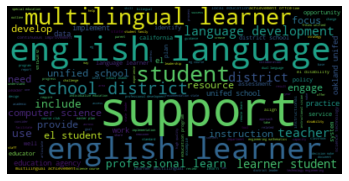

167741


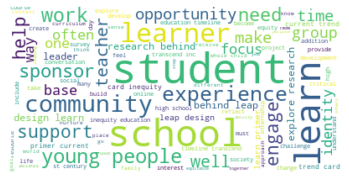

60244


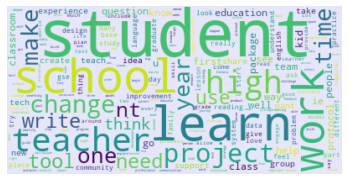

414619


In [ ]:
from wordcloud import WordCloud
from wordcloud import STOPWORDS
mllpi_text=""
trans_text=""
hth_text=""

for words in df1.Article[0:5]:
    mllpi_text+=words

wordcloud = WordCloud().generate(mllpi_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print(len(mllpi_text))
for words in df1.Article[5:8]:
    trans_text+=words
wordcloud = WordCloud(max_font_size=50, max_words=100, background_color="white").generate(trans_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print(len(trans_text))

for words in df1.Article[8:15]:
    hth_text+=words
wordcloud = WordCloud(stopwords=STOPWORDS, background_color="lavender",collocations=False).generate(hth_text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()
print(len(hth_text))

In [ ]:
mllpi_lst=mllpi_sent_df.Sentences.tolist()
trans_lst=trans_sent_df.Sentences.tolist()
hth_lst=hth_sent_df.Sentences.tolist()

**bold text**## 13. Stem


In [ ]:
stemmer = PorterStemmer()
lancaster=LancasterStemmer()
df1['Article'] = df1['Article'].apply( lambda x : ' '.join([stemmer.stem(word) for word in x.split()] ))
df1['Article'] = df1['Article'].apply( lambda x : ' '.join([lancaster.stem(word) for word in x.split()] ))


## 14. Tokenization

In [ ]:
df1['Article']=[TextBlob(text).words for text in df1['Article'].values]

# Some visualizations 

## 1. counting words 

In [ ]:
df1['words_count'] = df1['Article'].str.len()

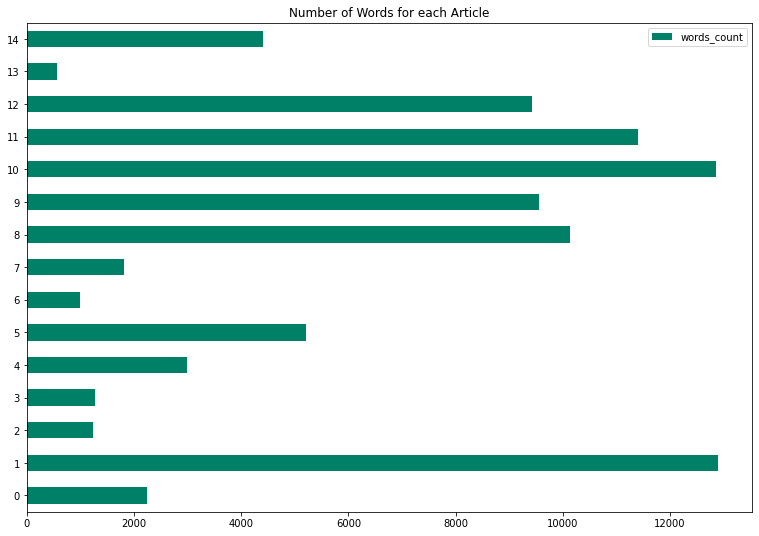

In [ ]:
df1.plot.barh( y='words_count',figsize=(13,9), colormap='summer', title='Number of Words for each Article');

## 2. Word Frequency Distribution

In [ ]:
from nltk.probability import FreqDist
def freq_plt(text):
    fdist_filtered = FreqDist(nltk.tokenize.word_tokenize(text))
    fdist_filtered.plot(30,title='Frequency distribution for 30 most common tokens in our text collection')
    

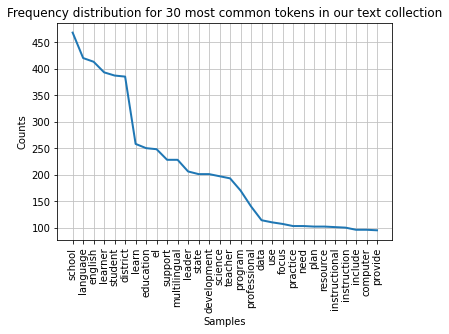

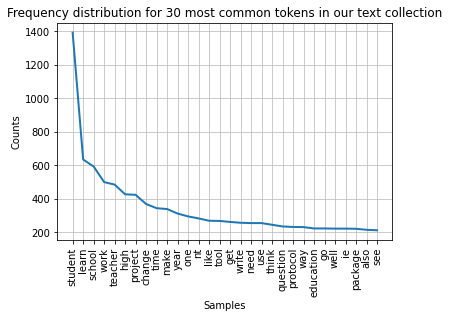

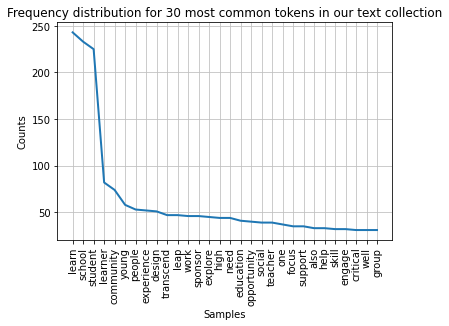

In [ ]:
freq_plt(mllpi_text)
freq_plt(hth_text)
freq_plt(trans_text)

## 3. Ngrams 


In [ ]:
from nltk.tokenize import word_tokenize
from nltk.util import ngrams

def get_ngrams(text, n ):
    n_grams = ngrams(word_tokenize(text), n)
    return [ ' '.join(grams) for grams in n_grams]
def ngrams_plt(text,n, n_col):
    ngrams_series = (pd.Series(get_ngrams(text, n)).value_counts())[:20]
    ngrams_series.sort_values().plot.barh(color=n_col, width=.9, figsize=(12, 8))
    plt.title('20 Most Frequently Occuring Trigrams')
    
    plt.xlabel('# of Occurances')

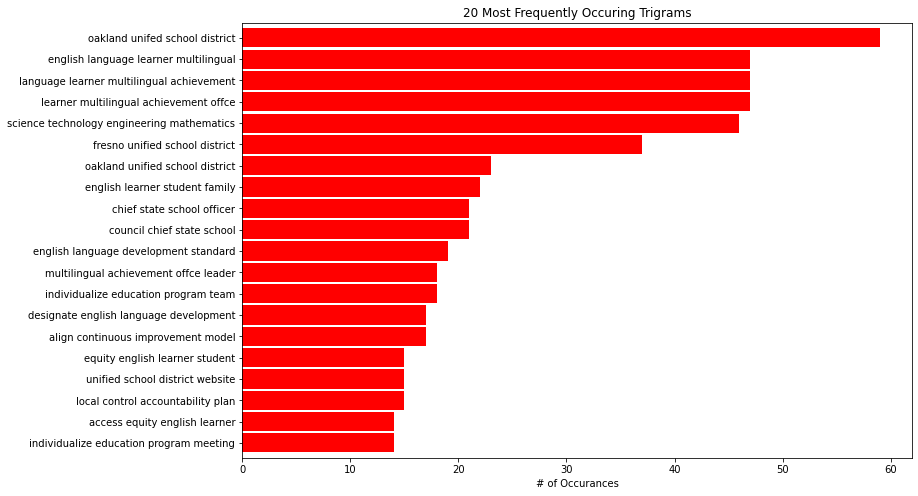

In [ ]:
ngrams_plt(mllpi_text,4,'red')

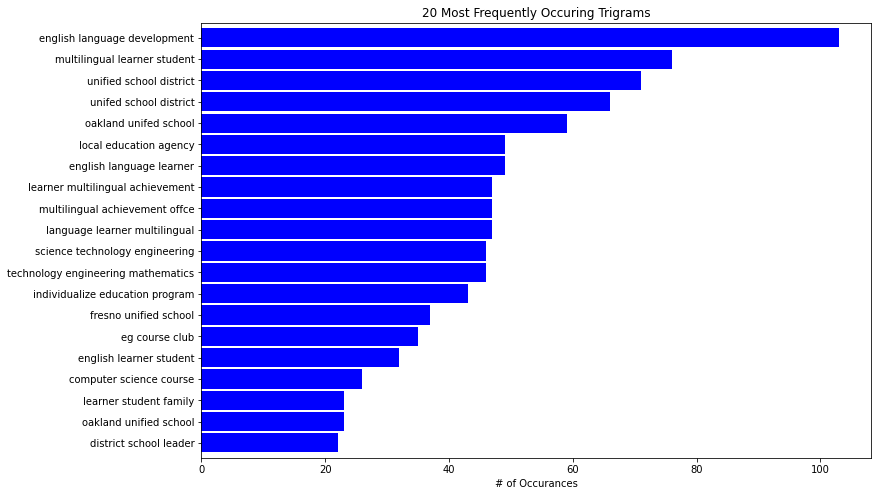

In [ ]:
ngrams_plt(mllpi_text,3,'blue')

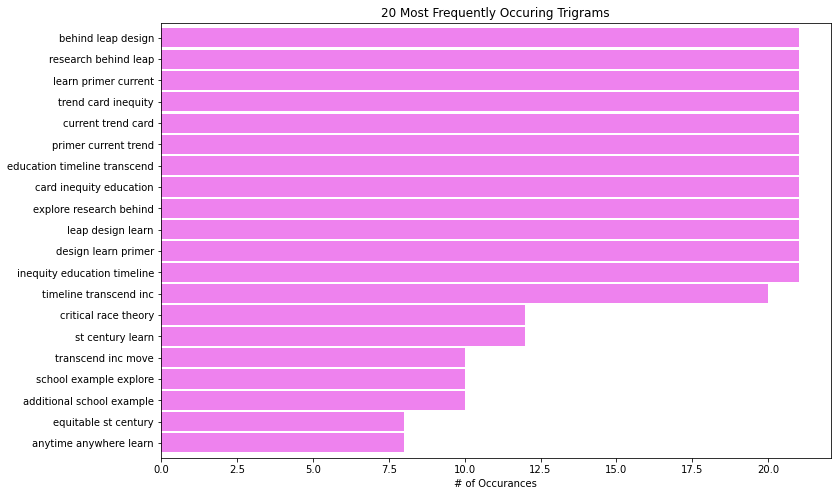

In [ ]:
ngrams_plt(trans_text,3,'violet')

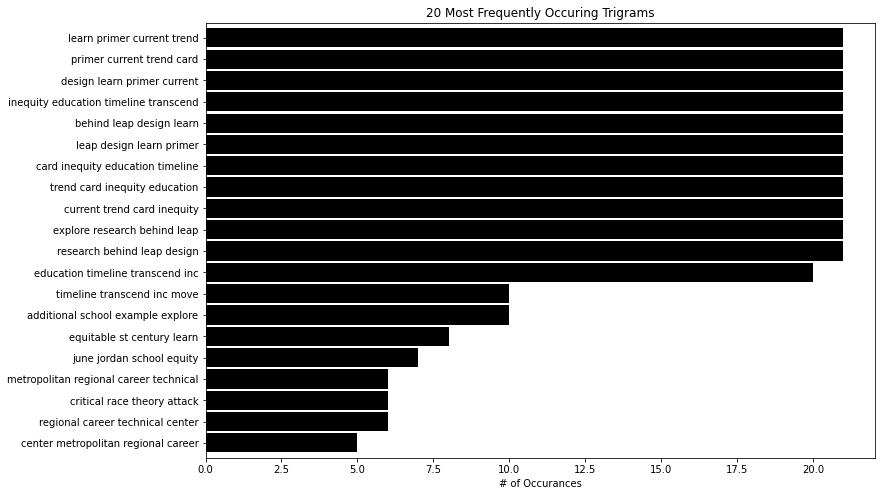

In [ ]:
ngrams_plt(trans_text,4,'black')

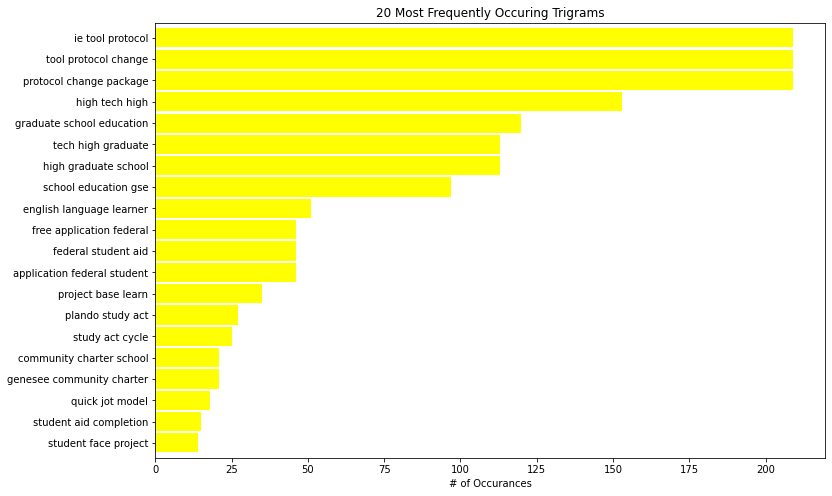

In [ ]:
ngrams_plt(hth_text,3,'yellow')

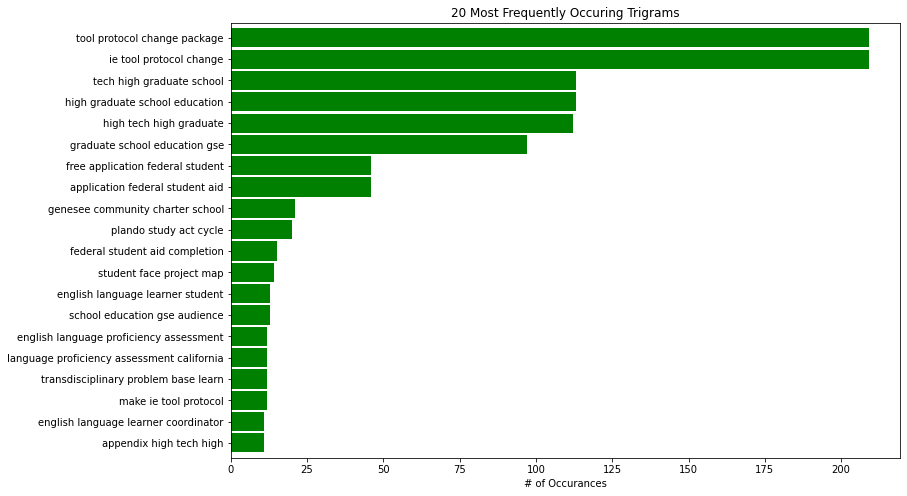

In [ ]:
ngrams_plt(hth_text,4,'green')

## 4. Word Cloud for Ngrams


### Bigrams 

In [ ]:
import nltk
def freq_lstbigram(text):
    text = text.replace("'", "")
    tokens = nltk.word_tokenize(text)
    text11 = nltk.Text(tokens)
    text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text11]
    text_content = [s for s in text_content if len(s) != 0]
    nltk_tokens = nltk.word_tokenize(text)  
    bigrams_list = list(nltk.bigrams(text_content))
    #print(bigrams_list)
    dictionary2 = [' '.join(tup) for tup in bigrams_list]
    vectorizer = CountVectorizer(ngram_range=(2, 2))
    bag_of_words = vectorizer.fit_transform(dictionary2)
    vectorizer.vocabulary_
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    #Generating wordcloud and saving as jpg image
    words_dict = dict(words_freq)
    WC_height = 1000
    WC_width = 1500
    WC_max_words = 200
    wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=STOPWORDS)
    wordCloud.generate_from_frequencies(words_dict)
    plt.title('Most frequently occurring bigrams connected by same colour and font size')
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordCloud.to_file('wordcloud_bigram.jpg')
    return words_freq
    

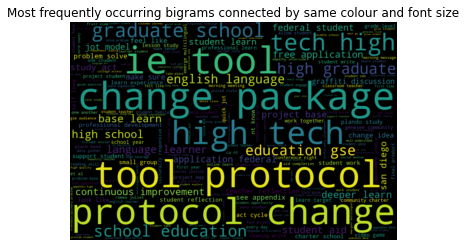

[('change package', 218),
 ('ie tool', 209),
 ('tool protocol', 209),
 ('protocol change', 209),
 ('high tech', 163),
 ('tech high', 154),
 ('graduate school', 122),
 ('school education', 120),
 ('high graduate', 113),
 ('education gse', 97),
 ('english language', 70),
 ('high school', 54),
 ('language learner', 51),
 ('base learn', 50),
 ('continuous improvement', 49),
 ('deeper learn', 48),
 ('student aid', 47),
 ('free application', 46),
 ('application federal', 46),
 ('federal student', 46),
 ('san diego', 43),
 ('project base', 43),
 ('student learn', 40),
 ('study act', 39),
 ('jot model', 37),
 ('graffiti discussion', 34),
 ('make sure', 34),
 ('teacher reflection', 29),
 ('change idea', 29),
 ('feel like', 28),
 ('problem solve', 28),
 ('see appendix', 28),
 ('professional development', 27),
 ('small group', 27),
 ('support student', 27),
 ('look like', 27),
 ('plando study', 27),
 ('charter school', 27),
 ('student work', 26),
 ('nt know', 26),
 ('student reflection', 26),
 ('

In [ ]:
freq_lstbigram(hth_text)

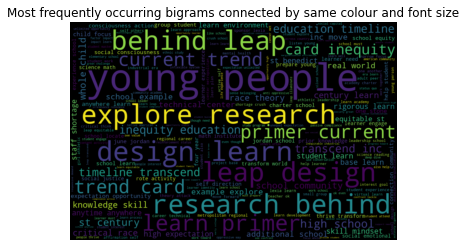

[('young people', 49),
 ('design learn', 22),
 ('explore research', 21),
 ('research behind', 21),
 ('behind leap', 21),
 ('leap design', 21),
 ('learn primer', 21),
 ('primer current', 21),
 ('current trend', 21),
 ('trend card', 21),
 ('card inequity', 21),
 ('inequity education', 21),
 ('education timeline', 21),
 ('timeline transcend', 21),
 ('transcend inc', 20),
 ('high school', 20),
 ('st century', 16),
 ('whole child', 14),
 ('school community', 13),
 ('knowledge skill', 12),
 ('century learn', 12),
 ('critical race', 12),
 ('race theory', 12),
 ('inc move', 10),
 ('additional school', 10),
 ('school example', 10),
 ('example explore', 10),
 ('real world', 10),
 ('technical center', 10),
 ('high expectation', 9),
 ('rigorous learn', 9),
 ('anytime anywhere', 9),
 ('skill mindset', 9),
 ('student learn', 9),
 ('base learn', 9),
 ('st benedict', 9),
 ('staff shortage', 9),
 ('learn environment', 8),
 ('equitable st', 8),
 ('expectation opportunity', 8),
 ('child focus', 8),
 ('an

In [ ]:
freq_lstbigram(trans_text)

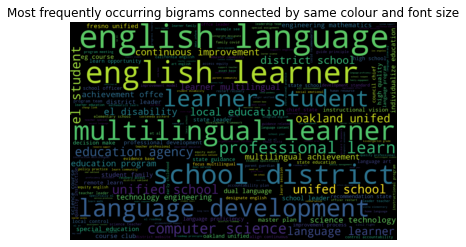

[('english language', 204),
 ('english learner', 178),
 ('multilingual learner', 155),
 ('school district', 152),
 ('language development', 124),
 ('learner student', 109),
 ('professional learn', 97),
 ('computer science', 96),
 ('el student', 76),
 ('unified school', 71),
 ('education agency', 68),
 ('unifed school', 66),
 ('oakland unifed', 59),
 ('language learner', 56),
 ('district school', 52),
 ('local education', 51),
 ('continuous improvement', 50),
 ('el disability', 48),
 ('learner multilingual', 48),
 ('education program', 47),
 ('multilingual achievement', 47),
 ('achievement offce', 47),
 ('science technology', 46),
 ('technology engineering', 46),
 ('engineering mathematics', 46),
 ('dual language', 43),
 ('individualize education', 43),
 ('school leader', 42),
 ('student family', 38),
 ('fresno unified', 37),
 ('special education', 37),
 ('district leader', 36),
 ('eg course', 35),
 ('course club', 35),
 ('master plan', 33),
 ('high quality', 30),
 ('state leader', 28),

In [ ]:
freq_lstbigram(mllpi_text)

### Trigrams


In [ ]:
import nltk
def freq_lsttrigram(text):
    text = text.replace("'", "")
    tokens = nltk.word_tokenize(text)
    text11 = nltk.Text(tokens)
    text_content = [''.join(re.split("[ .,;:!?‘’``''@#$%^_&*()<>{}~\n\t\\\-]", word)) for word in text11]
    text_content = [s for s in text_content if len(s) != 0]
    nltk_tokens = nltk.word_tokenize(text)  
    trigrams_list = list(nltk.trigrams(text_content))
    #print(trigrams_list)
    dictionary2 = [' '.join(tup) for tup in trigrams_list]
    vectorizer = CountVectorizer(ngram_range=(3,3))
    bag_of_words = vectorizer.fit_transform(dictionary2)
    vectorizer.vocabulary_
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    #Generating wordcloud and saving as jpg image
    words_dict = dict(words_freq)
    WC_height = 1000
    WC_width = 1500
    WC_max_words = 200
    wordCloud = WordCloud(max_words=WC_max_words, height=WC_height, width=WC_width,stopwords=STOPWORDS)
    wordCloud.generate_from_frequencies(words_dict)
    plt.title('Most frequently occurring trigrams connected by same colour and font size')
    plt.imshow(wordCloud, interpolation='bilinear')
    plt.axis("off")
    plt.show()
    wordCloud.to_file('wordcloud_bigram.jpg')
    #return words_freq

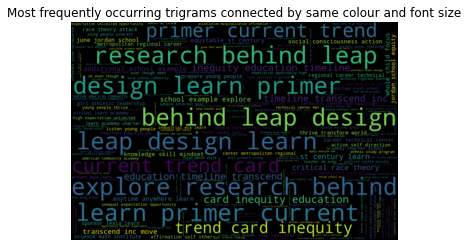

In [ ]:
freq_lsttrigram(trans_text)

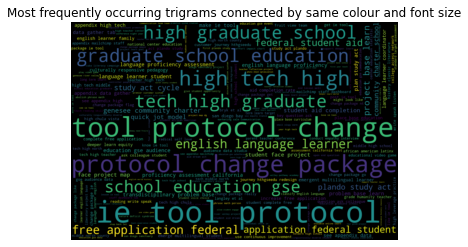

In [ ]:
freq_lsttrigram(hth_text)

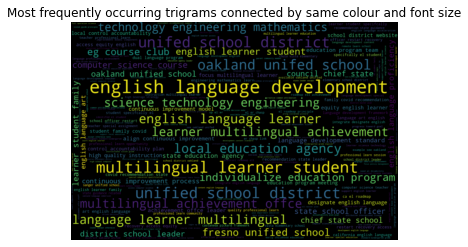

In [ ]:
freq_lsttrigram(mllpi_text)

# Vectorizing 

## Bag Of Words 


In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.tokenize import sent_tokenize
def bow(texts):
    vectorizer = CountVectorizer()
    X = vectorizer.fit_transform(sent_tokenize(texts))
    return X.toarray()

In [ ]:
mllpi_bow=bow(mllpi_text)
hth_bow=bow(hth_text)
trans_bow=bow(trans_text)

In [ ]:
#from functools import reduce
#trans_bow=reduce(lambda x, y: x.extend(y), trans_bow)
#trans_bow=list(trans_bow.flatten())

## TF- IDF

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm

from sklearn.cluster import MiniBatchKMeans
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [ ]:
tfidf = TfidfVectorizer(
    min_df = 5,
    max_df = 0.95,
    max_features = 8000,
    stop_words = 'english'
)
def tfidffit(data):
    tfidf.fit(data.Sentences)
    text = tfidf.transform(data.Sentences)
    return text
mllpi_tffit=tfidffit(mllpi_sent_df)
hth_tffit=tfidffit(hth_sent_df)
trans_tffit=tfidffit(trans_sent_df)

# 1. K- means clustering

## K-means with optimal cluster founded by SSE method 


Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


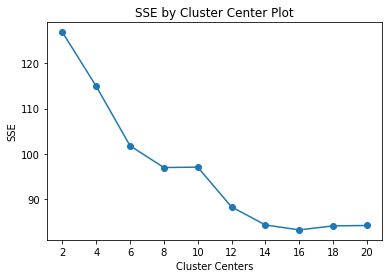

In [ ]:
def find_optimal_clusters(data, max_k):
    iters = range(2, max_k+1, 2)
    
    sse = []
    for k in iters:
        sse.append(MiniBatchKMeans(n_clusters=k, init_size=1024, batch_size=2048, random_state=20).fit(data).inertia_)
        print('Fit {} clusters'.format(k))
        
    f, ax = plt.subplots(1, 1)
    ax.plot(iters, sse, marker='o')
    ax.set_xlabel('Cluster Centers')
    ax.set_xticks(iters)
    ax.set_xticklabels(iters)
    ax.set_ylabel('SSE')
    ax.set_title('SSE by Cluster Center Plot')
    
find_optimal_clusters(mllpi_tffit, 20)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


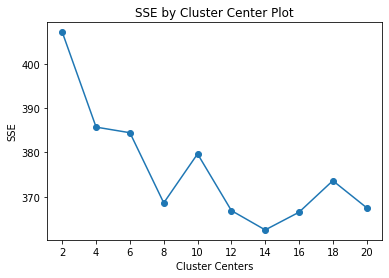

In [ ]:
find_optimal_clusters(hth_tffit, 20)

Fit 2 clusters
Fit 4 clusters
Fit 6 clusters
Fit 8 clusters
Fit 10 clusters
Fit 12 clusters
Fit 14 clusters
Fit 16 clusters
Fit 18 clusters
Fit 20 clusters


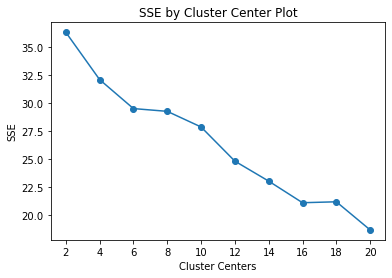

In [ ]:
find_optimal_clusters(trans_tffit, 20)

In [ ]:
def clusters(text,n):
    clusters = MiniBatchKMeans(n_clusters=n, init_size=1024, batch_size=2048, random_state=20).fit_predict(text)
    return clusters

trans_cluster=clusters(trans_tffit,6)
hth_cluster=clusters(hth_tffit,4)
mllpi_cluster=clusters(mllpi_tffit,8)


In [ ]:
def plot_tsne_pca(data, labels):
    max_label = max(labels)
    max_items = np.random.choice(range(data.shape[0]), size=49, replace=False)
    
    pca = PCA(n_components=2).fit_transform(data[max_items,:].todense())
    tsne = TSNE().fit_transform(PCA(n_components=5).fit_transform(data[max_items,:].todense()))
    
    
    idx = np.random.choice(range(pca.shape[0]), size=49, replace=False)
    label_subset = labels[max_items]
    label_subset = [cm.hsv(i/max_label) for i in label_subset[idx]]
    
    f, ax = plt.subplots(1, 2, figsize=(14, 6))
    
    ax[0].scatter(pca[idx, 0], pca[idx, 1], c=label_subset)
    ax[0].set_title('PCA Cluster Plot')
    
    ax[1].scatter(tsne[idx, 0], tsne[idx, 1], c=label_subset)
    ax[1].set_title('TSNE Cluster Plot')
    

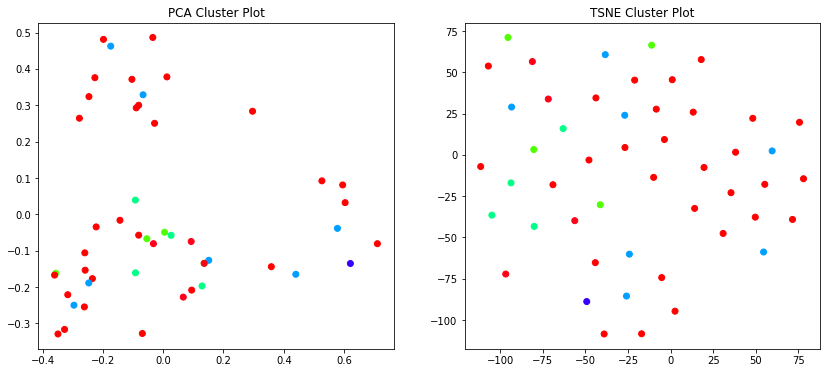

In [ ]:
plot_tsne_pca(trans_tffit, trans_cluster)

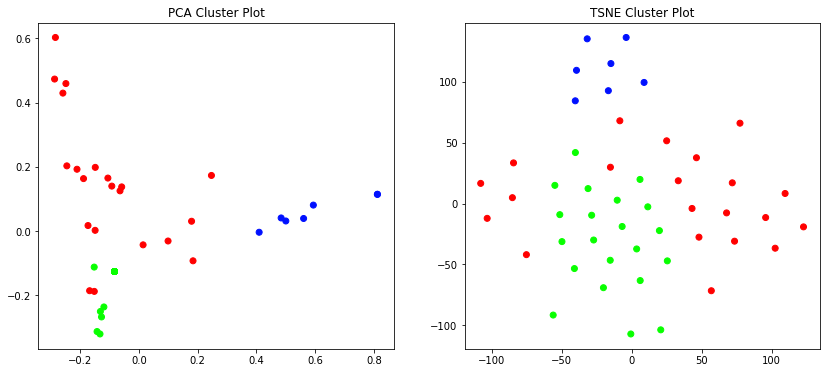

In [ ]:
plot_tsne_pca(hth_tffit, hth_cluster)

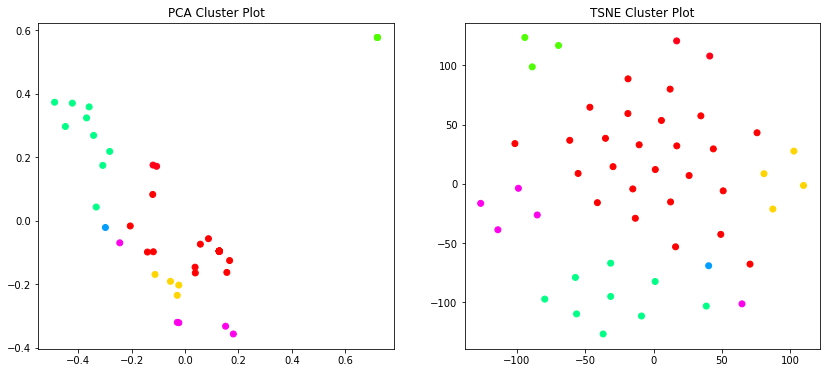

In [ ]:
plot_tsne_pca(mllpi_tffit, mllpi_cluster)

In [ ]:
from sklearn import cluster
from sklearn.cluster import KMeans
def top_n_words_kmeans(text,m):
    model = cluster.KMeans(n_clusters=m, init="k-means++", max_iter=100, n_init=1)
    model.fit(trans_tffit)
    order_centroids = model.cluster_centers_.argsort()[:, ::-1]
    return order_centroids

In [ ]:
trans_kmean_topn=top_n_words_kmeans(trans_tffit,6)
hth_kmean_topn=top_n_words_kmeans(hth_tffit,4)
mllpi_kmean_topn=top_n_words_kmeans(mllpi_tffit,8)


In [ ]:
i = 0
for cluster in trans_kmean_topn:
    print (f"Cluster {i}")
    for keyword in cluster[0:10]:
        print (labels[keyword])
    print ("")
    i=i+1

Cluster 0
school
people
young
year
communities
learning
especially
understand
schools
century

Cluster 1
community
students
program
school
student
design
family
project
high
designed

Cluster 2
learners
learning
young
people
schools
opportunities
knowledge
society
experiences
skills

Cluster 3
benedict
st
community
core
group
school
building
connection
groups
students

Cluster 4
learn
school
like
make
people
better
action
leaps
use
learning

Cluster 5
students
school
learning
young
people
student
community
group
high
explore



In [ ]:
i = 0
for cluster in hth_kmean_topn:
    print (f"Cluster {i}")
    for keyword in cluster[0:10]:
        print (labels[keyword])
    print ("")
    i=i+1

Cluster 0
students
school
learning
community
group
high
student
explore
people
design

Cluster 1
learning
learners
learn
young
schools
school
people
opportunities
knowledge
students

Cluster 2
data
example
way
kids
listen
conversations
think
nt
school
conversation

Cluster 3
benedict
st
community
core
group
school
students
building
connection
groups



In [ ]:
i = 0
for cluster in mllpi_kmean_topn:
    print (f"Cluster {i}")
    for keyword in cluster[0:10]:
        print (labels[keyword])
    print ("")
    i=i+1

Cluster 0
learn
school
conversation
questions
people
like
guide
use
leaps
make

Cluster 1
benedict
st
group
students
community
school
groups
connection
respect
time

Cluster 2
students
school
learning
community
explore
student
high
additional
program
based

Cluster 3
learners
learning
knowledge
young
schools
people
experiences
skills
society
opportunities

Cluster 4
learning
young
people
needs
school
design
leaders
meaningful
schools
diverse

Cluster 5
teachers
schools
leaders
learning
teacher
critical
school
based
equity
need

Cluster 6
data
example
listen
questions
school
way
young
learning
right
important

Cluster 7
core
building
benedict
st
community
practices
located
new
group
focus



## One Hot Encoding 

In [ ]:
from sklearn.preprocessing import OneHotEncoder
from nltk.tokenize import sent_tokenize
encoder = OneHotEncoder()
mllpi_X= encoder.fit_transform(mllpi_sent_df['Sentences'].values.reshape(-1,1))
mllpi_encoded_docs= pd.DataFrame(mllpi_X.toarray())

trans_X= encoder.fit_transform(trans_sent_df['Sentences'].values.reshape(-1,1))
trans_encoded_docs= pd.DataFrame(trans_X.toarray())

hth_X= encoder.fit_transform(hth_sent_df['Sentences'].values.reshape(-1,1))
hth_encoded_docs= pd.DataFrame(hth_X.toarray())

In [ ]:
mllpi_encoded_docs

,0,1,2,3,4,5,6,7,8,9,...,131,132,133,134,135,136,137,138,139,140
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
235,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
236,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
237,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
trans_encoded_docs

,0,1,2,3,4,5,6,7,8,9,...,40,41,42,43,44,45,46,47,48,49
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
hth_encoded_docs

,0,1,2,3,4,5,6,7,8,9,...,425,426,427,428,429,430,431,432,433,434
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
673,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
675,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
676,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Word Embedding 

## Word2Vec

In [ ]:
from gensim.models import Word2Vec
def wrd2vec(text):
    model = Word2Vec(text, size=128, window=3, min_count=5, workers=4)
    model.wv.save_word2vec_format("got_word2vec.txt", binary=False)
    return model

In [ ]:
wrd2vec(mllpi_lst)
wrd2vec(hth_lst)
wrd2vec(trans_lst)

# Summerizations 

## 2. LSA

In [ ]:
from sklearn.decomposition import TruncatedSVD
lsa_model = TruncatedSVD(n_components=10, algorithm='randomized', n_iter=10, random_state=42)

lsa_top=lsa_model.fit_transform(mllpi_tffit)

In [ ]:
print(lsa_top)
print(lsa_top.shape)
print(lsa_model.components_)

[[ 0.28764094 -0.14691738 -0.04168463 ...  0.46346174 -0.27037735
  -0.24216563]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.44218581 -0.19696229 -0.06895022 ...  0.47337636 -0.26363117
  -0.20643399]
 ...
 [ 0.24927497 -0.16863504 -0.06227345 ...  0.05339554  0.00762017
  -0.09447847]
 [ 0.          0.          0.         ...  0.          0.
   0.        ]
 [ 0.29774638 -0.19544517 -0.08420384 ...  0.04077717  0.05104239
  -0.11922212]]
(239, 10)
[[ 3.69717616e-02  7.18508957e-02  1.93832468e-02 ...  9.12453846e-03
   2.48235889e-02  2.00803103e-02]
 [-2.29301807e-02  5.61788470e-02 -1.79459169e-02 ... -4.91812259e-03
  -3.14558006e-03 -1.46277920e-02]
 [-2.65985934e-03 -1.14131808e-02 -9.61443206e-03 ... -3.91825305e-04
  -4.34059018e-05  1.70954228e-03]
 ...
 [-4.95028599e-02  1.09699149e-01 -6.83977232e-03 ... -9.76671778e-03
  -2.66628570e-02 -1.71335744e-02]
 [-5.76770302e-03 -7.14608109e-02  1.81418933e-02 ...  7.53542288e-03
  -1.51514290e-02 -

In [ ]:
vocab = tfidf.get_feature_names()

for i, comp in enumerate(lsa_model.components_):
    vocab_comp = zip(vocab, comp)
    sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
    print("Topic "+str(i)+": ")
    for t in sorted_words:
        print(t[0],end=" ")
    print("\n")
         

Topic 0: 
skills inequities prior life provides feel place reflect model problems 

Topic 1: 
inequities life feel level able small transcend person specific explore 

Topic 2: 
state environment reflect prior collaboration teachers problems current variety develop 

Topic 3: 
provides relevant potential skills authentic like community complete state academic 

Topic 4: 
develop provides relevant feel life authentic collaboration potential current teachers 

Topic 5: 
develop skills way like staff learners example explore knowledge create 

Topic 6: 
feel life self society able time online factors develop challenges 

Topic 7: 
collaboration current like learners example skills way staff able teachers 

Topic 8: 
collaboration factors young range relevant place potential self members challenges 

Topic 9: 
skills explore place life small knowledge projects collaboration academic teachers 



In [ ]:
from sklearn.decomposition import TruncatedSVD

def get_lsa_topics(model, num_topics):
    lsa_model = TruncatedSVD(n_components=num_topics, algorithm='randomized', n_iter=10, random_state=42)
    lsa_top=lsa_model.fit_transform(model)
    print(lsa_top.shape)
    print(lsa_model.components_)
    vocab = tfidf.get_feature_names()

    for i, comp in enumerate(lsa_model.components_):
        vocab_comp = zip(vocab, comp)
        sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
        print("Topic "+str(i)+": ")
        for t in sorted_words:
            print(t[0],end=" ")
        print("\n")
    

In [ ]:
get_lsa_topics(mllpi_tffit,10)

(239, 10)
[[ 3.69717616e-02  7.18508957e-02  1.93832468e-02 ...  9.12453846e-03
   2.48235889e-02  2.00803103e-02]
 [-2.29301807e-02  5.61788470e-02 -1.79459169e-02 ... -4.91812259e-03
  -3.14558006e-03 -1.46277920e-02]
 [-2.65985934e-03 -1.14131808e-02 -9.61443206e-03 ... -3.91825305e-04
  -4.34059018e-05  1.70954228e-03]
 ...
 [-4.95028599e-02  1.09699149e-01 -6.83977232e-03 ... -9.76671778e-03
  -2.66628570e-02 -1.71335744e-02]
 [-5.76770302e-03 -7.14608109e-02  1.81418933e-02 ...  7.53542288e-03
  -1.51514290e-02 -2.49510872e-02]
 [ 1.04883214e-02 -4.69381133e-02  7.34207396e-02 ... -8.14755537e-04
   9.63214388e-03 -2.41074143e-03]]
Topic 0: 
skills inequities prior life provides feel place reflect model problems 

Topic 1: 
inequities life feel level able small transcend person specific explore 

Topic 2: 
state environment reflect prior collaboration teachers problems current variety develop 

Topic 3: 
provides relevant potential skills authentic like community complete state a

In [ ]:
get_lsa_topics(trans_tffit,10)

(50, 10)
[[ 0.03648423  0.02647464  0.04186012 ...  0.07582392  0.05343234
   0.15047481]
 [-0.0464105  -0.01677441  0.00064538 ... -0.02127807 -0.00269457
  -0.06269702]
 [-0.05699824  0.00576498  0.05980316 ...  0.0419479   0.03606224
  -0.2245616 ]
 ...
 [ 0.04294952  0.0265173   0.00919043 ... -0.03907951  0.05686863
   0.18667918]
 [-0.06738447  0.0158282   0.03978692 ... -0.03853257  0.00616928
   0.17900383]
 [-0.03490735 -0.01267822 -0.10915419 ...  0.12039457  0.05973377
   0.03609637]]
Topic 0: 
learning students school learners community young people schools learn st 

Topic 1: 
benedict st community group school students core groups building respect 

Topic 2: 
students school based leadership projects additional science day student high 

Topic 3: 
school learn questions conversation people listen young better example right 

Topic 4: 
leaders schools teachers design content insights teacher critical need nt 

Topic 5: 
learn teachers new benedict learning st learners need

In [ ]:
get_lsa_topics(hth_tffit,10)

(678, 10)
[[ 0.0049333   0.02211909  0.00198706 ...  0.00147977  0.00453979
   0.00356147]
 [ 0.01749665  0.03520055  0.00716579 ...  0.00703605  0.00180669
   0.01232715]
 [-0.00290285 -0.03352409 -0.00817837 ...  0.00998323 -0.00348733
  -0.00325506]
 ...
 [-0.00856541 -0.01344525 -0.009803   ... -0.00587924 -0.00624189
  -0.00828257]
 [-0.00441162 -0.00025652 -0.00048802 ... -0.00060842  0.00104362
   0.01517572]
 [ 0.02596724 -0.00093463  0.00112177 ... -0.00033291  0.00182054
  -0.00268155]]
Topic 0: 
schools understanding current transform authentic age problems able curriculum leaps 

Topic 1: 
understanding transform important leaps development mental different achieve connection able 

Topic 2: 
development important identities schools help includes small process ideas deeply 

Topic 3: 
listen transform understanding age able leaps different personal connection factors 

Topic 4: 
identities ideas online impact authentic ability mental environment foster deep 

Topic 5: 
age 

## 3. NMF

In [ ]:
from sklearn.preprocessing import normalize;
from sklearn.feature_extraction.text import TfidfTransformer

from sklearn.decomposition import NMF
num_topics = 10;

def nmfdec(text):
    transformer = TfidfTransformer(smooth_idf=False);
    x_tfidf = transformer.fit_transform(text);
    xtfidf_norm = normalize(x_tfidf, norm='l1', axis=1)
    model = NMF(n_components=num_topics);
    model.fit(xtfidf_norm)
    return model

In [ ]:
def get_nmf_topics(model, num_topics):
    feat_names = vectorizer.get_feature_names()
    word_dict = {};
    for i in range(num_topics):
        words_idss = model.components_[i].argsort()[:-10 - 1:-1]
        wordss = [feat_names[key] for key in words_idss]
        word_dict['Topic # ' + '{:02d}'.format(i+1)] = wordss;
    
    return pd.DataFrame(word_dict);

In [ ]:
get_nmf_topics(nmfdec(mllpi_tffit),10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,address,bands,advise,balow,contents,benefcial,category,al,acim,actions
1,certified,conflicts,allowed,complicated,clerks,conducts,confluence,compose,capabilities,allowing
2,book,assess,contact,areas,actively,absenteeism,built,allowed,competent,consisted
3,applied,administering,consuming,condition,assert,classified,ccsso,coherent,conversations,consider
4,council,area,assistant,continuousimprovement,cadre,approximately,constrain,able,classified,attends
5,convened,avenues,components,applied,assistant,center,ca,advise,collect,cabinet
6,centrally,convening,analysis,coaching,communications,attend,cohort,allow,component,asked
7,activity,autism,constrain,core,conclusion,adjustments,appropriate,assessed,chief,calibrated
8,convening,contextualization,constructed,apply,balanced,assert,anticipate,asks,approved,allocating
9,assignment,attended,able,conduct,audit,constitutes,asked,chapters,cohort,adopting


In [ ]:
get_nmf_topics(nmfdec(hth_tffit),10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,designated,feature,coherently,buy,anyone,implicate,age,materials,inventory,draws
1,enough,goes,helps,investing,benefits,johnson,afforded,affords,greatest,carissa
2,helps,lee,enough,beauty,exploring,advice,join,exclusionary,draw,enhance
3,explicit,arts,draws,demands,call,meaning,graduated,alignment,demands,helps
4,ix,email,carissa,decision,leads,megan,category,frameworks,features,come
5,allows,endeavor,helped,dashboards,carmen,away,emotional,examine,decision,citing
6,decrease,duration,everyone,demonstrated,compliance,grouping,heightened,gap,dashboards,call
7,beauty,expresses,doi,fostering,learn,gap,differentiated,balow,evaluation,go
8,gautsch,integrate,centering,languages,aging,focal,assessed,la,incidence,carmen
9,addressing,infant,information,ethics,directing,members,isolation,duration,languages,aging


In [ ]:
get_nmf_topics(nmfdec(trans_tffit), 10)

,Topic # 01,Topic # 02,Topic # 03,Topic # 04,Topic # 05,Topic # 06,Topic # 07,Topic # 08,Topic # 09,Topic # 10
0,allocated,accommodations,acquisition,alter,adaptability,afford,apps,active,assessing,afforded
1,actions,aspire,aspire,among,adherence,adjust,allows,accomplishments,allocation,accommodations
2,articulation,articulation,acquire,anchor,alejandre,achieve,articulated,accommodations,art,aspire
3,affords,art,advance,augment,attends,advising,agreements,almost,allocating,assessing
4,allowing,assert,actions,allocation,act,articulation,agencies,amount,analysts,adaptive
5,accompanied,advance,assistant,april,ask,anchor,actions,applicable,attribution,actions
6,apps,acquire,assessed,apart,articulation,augment,anchor,aspire,assert,afford
7,alongside,attribution,art,accuracy,alike,advance,augment,acquire,arts,alliances
8,attendance,assistant,apprenticeships,areas,adopting,assistant,assessing,advising,articulation,alternative
9,absent,april,align,access,ample,adaptive,articulation,afford,alike,apps


# 4. LDA

In [ ]:
import sys
from pprint import pprint

# Gensim
import gensim, spacy, logging, warnings
import gensim.corpora as corpora
from gensim.utils import lemmatize, simple_preprocess
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# NLTK Stop words
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
stop_words.extend(['from', 'subject', 're', 'edu', 'use', 'not', 'would', 'say', 'could', '_', 'be', 'know', 'good', 'go', 'get', 'do', 'done', 'try', 'many', 'some', 'nice', 'thank', 'think', 'see', 'rather', 'easy', 'easily', 'lot', 'lack', 'make', 'want', 'seem', 'run', 'need', 'even', 'right', 'line', 'even', 'also', 'may', 'take', 'come'])


In [ ]:
def sent_to_words(sentences):
    for sent in sentences:
        sent = gensim.utils.simple_preprocess(str(sent), deacc=True) 
        yield(sent)  

In [ ]:
def process_words(texts, stop_words=stop_words, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    texts = [[word for word in simple_preprocess(str(doc)) if word not in stop_words] for doc in texts]   
    return texts
data_ready = process_words(data_words)

## MLLPI DOC VISUALIZATION

In [ ]:
data = mllpi_sent_df.Sentences.values.tolist()
data_words = list(sent_to_words(data))
print(data_words[:1])

[['council', 'chief', 'state', 'school', 'officers', 'one', 'massachusetts', 'avenue', 'nw', 'suite', 'washington', 'dc', 'restart', 'recovery', 'access', 'equity', 'english', 'learner', 'students', 'families', 'covid', 'recommendations', 'state', 'leaders', 'council', 'chief', 'state', 'school', 'officers', 'restart', 'recovery', 'access', 'equity', 'english', 'learner', 'students', 'families', 'covid', 'recommendations', 'state', 'leaders', 'except', 'otherwise', 'noted', 'licensed', 'creative', 'commons', 'attribution', 'international', 'license', 'available', 'council', 'chief', 'state', 'school', 'officers', 'restart', 'recovery', 'access', 'equity', 'english', 'learner', 'students', 'families', 'covid', 'recommendations', 'state', 'leaders', 'council', 'chief', 'state', 'school', 'officers', 'council', 'chief', 'state', 'school', 'officers', 'council', 'chief', 'state', 'school', 'officers', 'nonpartisan', 'nationwide', 'nonprofit', 'organization', 'public', 'officials', 'head', 

In [ ]:
bigram = gensim.models.Phrases(data_words, min_count=5, threshold=100)
trigram = gensim.models.Phrases(bigram[data_words], threshold=100)  
bigram_mod = gensim.models.phrases.Phraser(bigram)
trigram_mod = gensim.models.phrases.Phraser(trigram)


In [ ]:
# Create Dictionary
id2word = corpora.Dictionary(data_ready)

# Create Corpus: Term Document Frequency
corpus = [id2word.doc2bow(text) for text in data_ready]

# Build LDA model
lda_model = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model.print_topics())

[(0,
  '0.020*"literacy" + 0.013*"learn" + 0.010*"fact" + 0.008*"still" + '
  '0.005*"desire" + 0.005*"real" + 0.003*"limiting" + 0.003*"world" + '
  '0.002*"reducing" + 0.001*"lee"'),
 (1,
  '0.092*"education" + 0.046*"els" + 0.040*"disabilities" + 0.034*"agencies" + '
  '0.029*"local" + 0.027*"individualized" + 0.026*"state" + 0.024*"guidance" + '
  '0.019*"data" + 0.018*"states"'),
 (2,
  '0.067*"science" + 0.034*"multilingual" + 0.028*"el" + 0.026*"school" + '
  '0.014*"learner" + 0.013*"goals" + 0.011*"policies" + 0.011*"mathematics" + '
  '0.011*"students" + 0.011*"early"'),
 (3,
  '0.035*"person" + 0.035*"meetings" + 0.030*"supports" + 0.026*"service" + '
  '0.022*"address" + 0.020*"developing" + 0.018*"plan" + 0.016*"districts" + '
  '0.015*"technology" + 0.013*"educators"'),
 (4,
  '0.045*"language" + 0.040*"learning" + 0.036*"program" + 0.035*"development" '
  '+ 0.028*"english" + 0.026*"support" + 0.021*"teachers" + 0.018*"leaders" + '
  '0.017*"courses" + 0.017*"professiona

## Finding optimal num topic

In [ ]:
mallet_path = '/Users/user/Downloads/mallet-2.0.8/bin/mallet' 
def compute_coherence_values(dictionary, corpus, texts, limit, start=2, step=2):
    coherence_values = []
    model_list = []
    for num_topics in range(start, limit, step):
        model = gensim.models.wrappers.LdaMallet(mallet_path, corpus=corpus, num_topics=num_topics, id2word=id2word)
        model_list.append(model)
        coherencemodel = CoherenceModel(model=model, texts=texts, dictionary=dictionary, coherence='c_v')
        coherence_values.append(coherencemodel.get_coherence())

    return model_list, coherence_values

In [ ]:
model_list, coherence_values = compute_coherence_values(dictionary=id2word, corpus=corpus, texts=data_ready, start=2, limit=40, step=2)


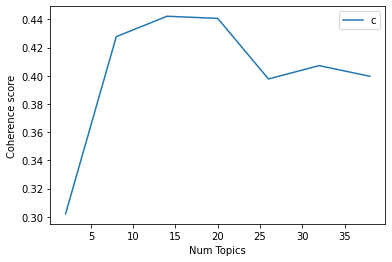

In [ ]:
limit=40; start=2; step=6;
x = range(start, limit, step)
plt.plot(x, coherence_values)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 2))


Num Topics = 2  has Coherence Value of 0.3
Num Topics = 8  has Coherence Value of 0.43
Num Topics = 14  has Coherence Value of 0.44
Num Topics = 20  has Coherence Value of 0.44
Num Topics = 26  has Coherence Value of 0.4
Num Topics = 32  has Coherence Value of 0.41
Num Topics = 38  has Coherence Value of 0.4


In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus, texts=data):
    # Init output
    sent_topics_df = pd.DataFrame()

    # Get main topic in each document
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list            
        # print(row)
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        # Get the Dominant topic, Perc Contribution and Keywords for each document
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:  # => dominant topic
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics_df = sent_topics_df.append(pd.Series([int(topic_num), round(prop_topic,4), topic_keywords]), ignore_index=True)
            else:
                break
    sent_topics_df.columns = ['Dominant_Topic', 'Perc_Contribution', 'Topic_Keywords']

    # Add original text to the end of the output
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return(sent_topics_df)


df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus, texts=data_ready)


In [ ]:
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

In [ ]:
# Display setting to show more characters in column
pd.options.display.max_colwidth = 100

sent_topics_sorteddf_mallet = pd.DataFrame()
sent_topics_outdf_grpd = df_topic_sents_keywords.groupby('Dominant_Topic')

for i, grp in sent_topics_outdf_grpd:
    sent_topics_sorteddf_mallet = pd.concat([sent_topics_sorteddf_mallet, 
                                             grp.sort_values(['Perc_Contribution'], ascending=False).head(1)], 
                                            axis=0)

# Reset Index    
sent_topics_sorteddf_mallet.reset_index(drop=True, inplace=True)

# Format
sent_topics_sorteddf_mallet.columns = ['Topic_Num', "Topic_Perc_Contrib", "Keywords", "Representative Text"]

# Show
sent_topics_sorteddf_mallet.head(10)

,Topic_Num,Topic_Perc_Contrib,Keywords,Representative Text
0,0.0,0.0714,"significant, braille, environment, reduced, feel, challenging, validly, manipulatives, distracti...",[]
1,4.0,0.9822,"education, english, els, disabilities, learning, language, agencies, state, program, local","[english, asa, second, language, esl, pull, dual, language, programming, note, important, provid..."
2,5.0,0.9454,"science, school, language, students, district, multilingual, leaders, el, english, learner","[asp, link, example, oakland, unifed, school, district, newcomer, wellness, initiative, availabl..."
3,11.0,0.8842,"additional, policy, framework, guide, act, around, office, inequities, educational, classrooms","[department, education, institute, education, sciences, washington, dc, ii, richards]"


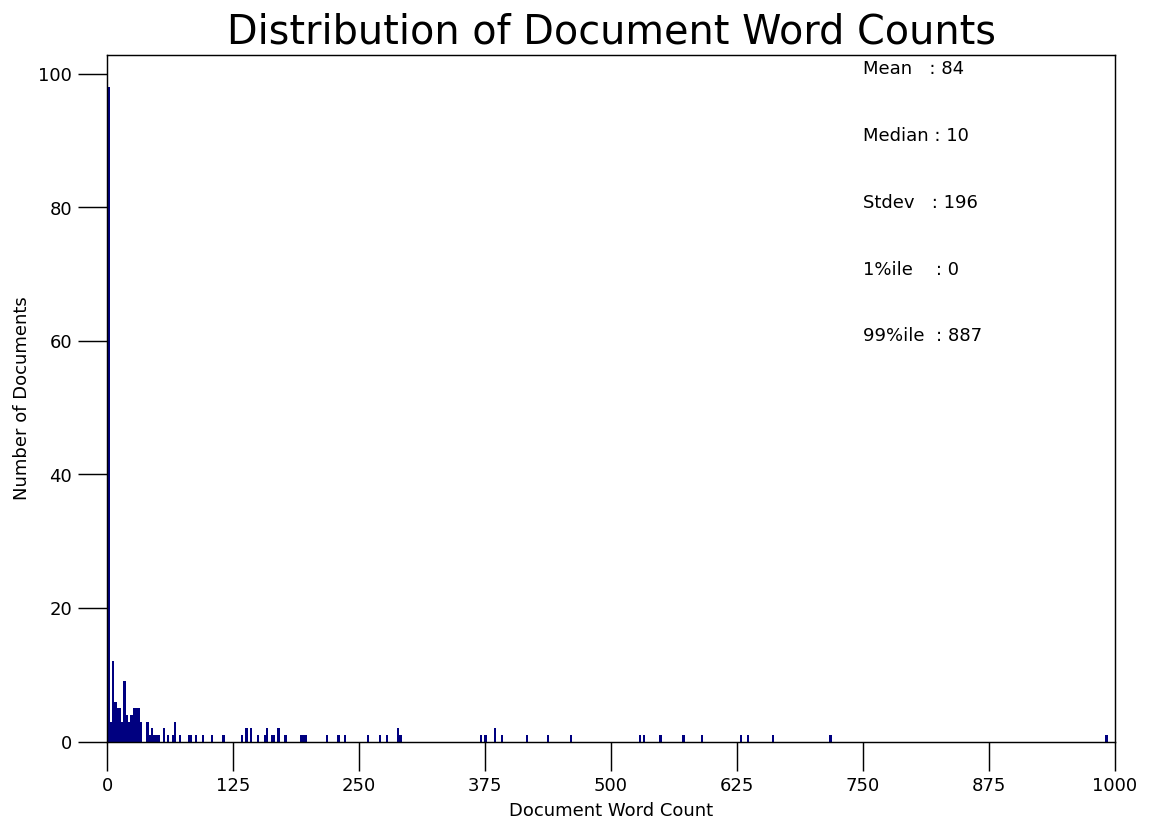

In [ ]:
doc_lens = [len(d) for d in df_dominant_topic.Text]

# Plot
plt.figure(figsize=(10,7), dpi=130)
plt.hist(doc_lens, bins = 750, color='navy')
plt.text(750, 100, "Mean   : " + str(round(np.mean(doc_lens))))
plt.text(750,  90, "Median : " + str(round(np.median(doc_lens))))
plt.text(750,  80, "Stdev   : " + str(round(np.std(doc_lens))))
plt.text(750,  70, "1%ile    : " + str(round(np.quantile(doc_lens, q=0.01))))
plt.text(750,  60, "99%ile  : " + str(round(np.quantile(doc_lens, q=0.99))))

plt.gca().set(xlim=(0, 1000), ylabel='Number of Documents', xlabel='Document Word Count')
plt.tick_params(size=16)
plt.xticks(np.linspace(0,1000,9))
plt.title('Distribution of Document Word Counts', fontdict=dict(size=22))
plt.show()


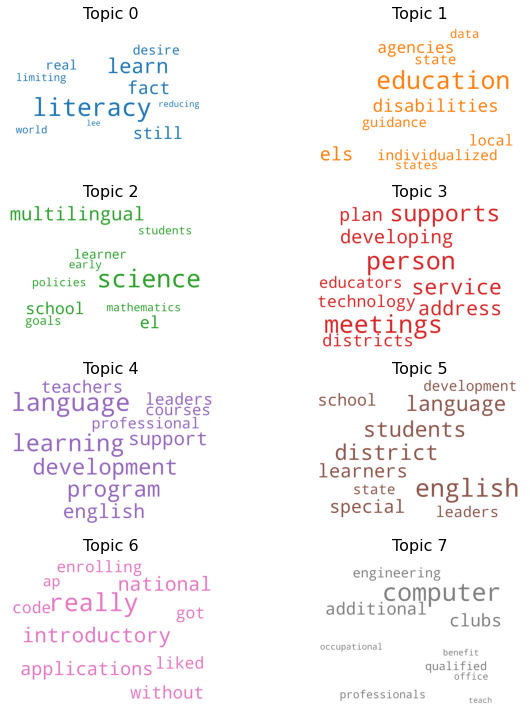

In [ ]:
# 1. Wordcloud of Top N words in each topic
from matplotlib import pyplot as plt
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors

cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] 
cloud = WordCloud(stopwords=stop_words,
                  background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)

topics = lda_model.show_topics(formatted=False)

fig, axes = plt.subplots(4, 2, figsize=(10,10), sharex=True, sharey=True)

for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')


plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

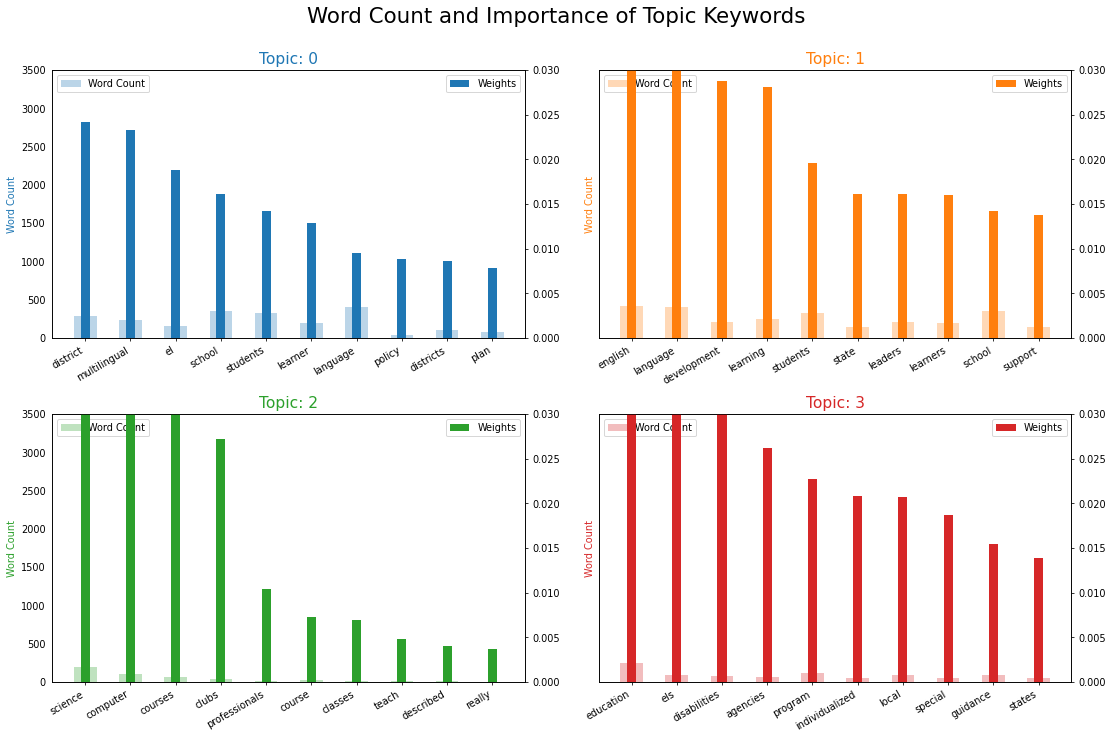

In [ ]:
from collections import Counter
topics = lda_model.show_topics(formatted=False)
data_flat = [w for w_list in data_ready for w in w_list]
counter = Counter(data_flat)

out = []
for i, topic in topics:
    for word, weight in topic:
        out.append([word, i , weight, counter[word]])

df = pd.DataFrame(out, columns=['word', 'topic_id', 'importance', 'word_count'])        

# Plot Word Count and Weights of Topic Keywords
fig, axes = plt.subplots(2, 2, figsize=(16,10), sharey=True, dpi=70)
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()]
for i, ax in enumerate(axes.flatten()):
    ax.bar(x='word', height="word_count", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.5, alpha=0.3, label='Word Count')
    ax_twin = ax.twinx()
    ax_twin.bar(x='word', height="importance", data=df.loc[df.topic_id==i, :], color=cols[i], width=0.2, label='Weights')
    ax.set_ylabel('Word Count', color=cols[i])
    ax_twin.set_ylim(0, 0.030); ax.set_ylim(0, 3500)
    ax.set_title('Topic: ' + str(i), color=cols[i], fontsize=16)
    ax.tick_params(axis='y', left=False)
    ax.set_xticklabels(df.loc[df.topic_id==i, 'word'], rotation=30, horizontalalignment= 'right')
    ax.legend(loc='upper left'); ax_twin.legend(loc='upper right')

fig.tight_layout(w_pad=2)    
fig.suptitle('Word Count and Importance of Topic Keywords', fontsize=22, y=1.05)    
plt.show()

In [ ]:
def topics_per_document(model, corpus, start=0, end=1):
    corpus_sel = corpus[start:end]
    dominant_topics = []
    topic_percentages = []
    for i, corp in enumerate(corpus_sel):
        topic_percs, wordid_topics, wordid_phivalues = model[corp]
        dominant_topic = sorted(topic_percs, key = lambda x: x[1], reverse=True)[0][0]
        dominant_topics.append((i, dominant_topic))
        topic_percentages.append(topic_percs)
    return(dominant_topics, topic_percentages)

dominant_topics, topic_percentages = topics_per_document(model=lda_model, corpus=corpus, end=-1)            

# Distribution of Dominant Topics in Each Document
df = pd.DataFrame(dominant_topics, columns=['Document_Id', 'Dominant_Topic'])
dominant_topic_in_each_doc = df.groupby('Dominant_Topic').size()
df_dominant_topic_in_each_doc = dominant_topic_in_each_doc.to_frame(name='count').reset_index()

# Total Topic Distribution by actual weight
topic_weightage_by_doc = pd.DataFrame([dict(t) for t in topic_percentages])
df_topic_weightage_by_doc = topic_weightage_by_doc.sum().to_frame(name='count').reset_index()

# Top 3 Keywords for each Topic
topic_top3words = [(i, topic) for i, topics in lda_model.show_topics(formatted=False) 
                                 for j, (topic, wt) in enumerate(topics) if j < 3]

df_top3words_stacked = pd.DataFrame(topic_top3words, columns=['topic_id', 'words'])
df_top3words = df_top3words_stacked.groupby('topic_id').agg(', \n'.join)
df_top3words.reset_index(level=0,inplace=True)

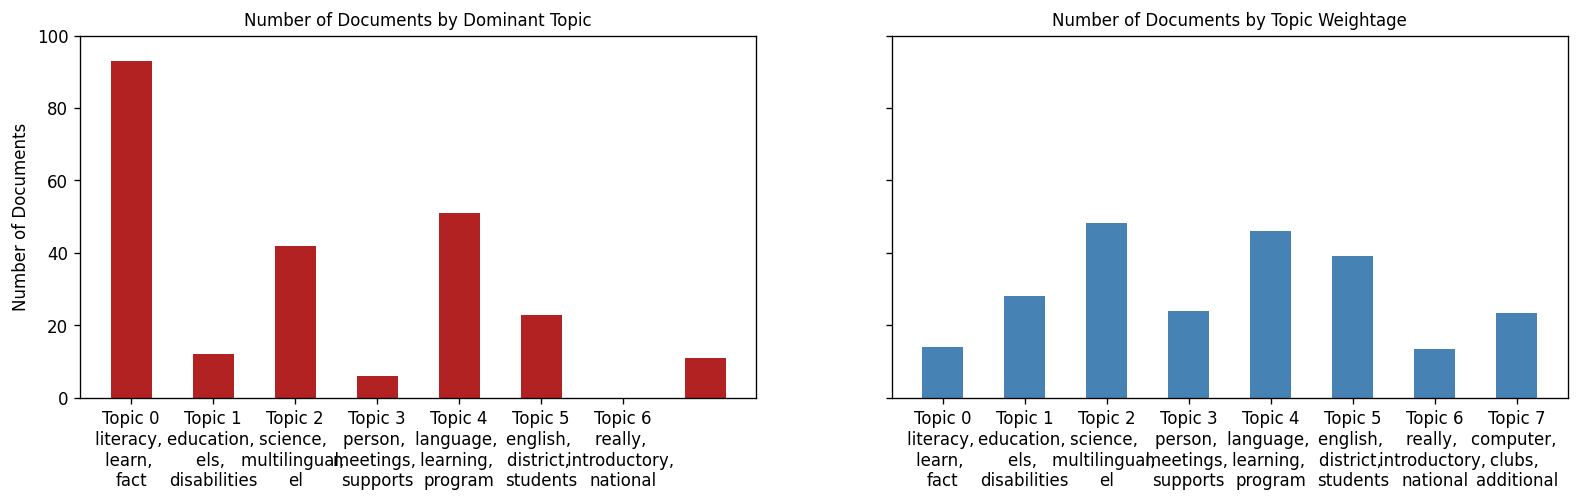

In [ ]:
from matplotlib.ticker import FuncFormatter

# Plot
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 4), dpi=120, sharey=True)

# Topic Distribution by Dominant Topics
ax1.bar(x='Dominant_Topic', height='count', data=df_dominant_topic_in_each_doc, width=.5, color='firebrick')
ax1.set_xticks(range(df_dominant_topic_in_each_doc.Dominant_Topic.unique().__len__()))
tick_formatter = FuncFormatter(lambda x, pos: 'Topic ' + str(x)+ '\n' + df_top3words.loc[df_top3words.topic_id==x, 'words'].values[0])
ax1.xaxis.set_major_formatter(tick_formatter)
ax1.set_title('Number of Documents by Dominant Topic', fontdict=dict(size=10))
ax1.set_ylabel('Number of Documents')
ax1.set_ylim(0, 100)

# Topic Distribution by Topic Weights
ax2.bar(x='index', height='count', data=df_topic_weightage_by_doc, width=.5, color='steelblue')
ax2.set_xticks(range(df_topic_weightage_by_doc.index.unique().__len__()))
ax2.xaxis.set_major_formatter(tick_formatter)
ax2.set_title('Number of Documents by Topic Weightage', fontdict=dict(size=10))

plt.show()

In [ ]:
# Get topic weights and dominant topics ------------
from sklearn.manifold import TSNE
from bokeh.plotting import figure, output_file, show
from bokeh.models import Label
from bokeh.io import output_notebook

# Get topic weights
topic_weights = []
for i, row_list in enumerate(lda_model[corpus]):
    topic_weights.append([w for i, w in row_list[0]])

# Array of topic weights    
arr = pd.DataFrame(topic_weights).fillna(0).values

# Keep the well separated points (optional)
arr = arr[np.amax(arr, axis=1) > 0.35]

# Dominant topic number in each doc
topic_num = np.argmax(arr, axis=1)

# tSNE Dimension Reduction
tsne_model = TSNE(n_components=2, verbose=1, random_state=0, angle=.99, init='pca')
tsne_lda = tsne_model.fit_transform(arr)

# Plot the Topic Clusters using Bokeh
output_notebook()
n_topics = 4
mycolors = np.array([color for name, color in mcolors.TABLEAU_COLORS.items()])
plot = figure(title="t-SNE Clustering of {} LDA Topics".format(n_topics), 
              plot_width=900, plot_height=700)
plot.scatter(x=tsne_lda[:,0], y=tsne_lda[:,1], color=mycolors[topic_num])
show(plot)

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 123 samples in 0.000s...
[t-SNE] Computed neighbors for 123 samples in 0.003s...
[t-SNE] Computed conditional probabilities for sample 123 / 123
[t-SNE] Mean sigma: 0.267181
[t-SNE] KL divergence after 250 iterations with early exaggeration: 57.448418
[t-SNE] KL divergence after 1000 iterations: 0.172798


Loading BokehJS ...

In [ ]:
import pyLDAvis
import pyLDAvis.gensim_models 
pyLDAvis.enable_notebook()
vis = pyLDAvis.gensim_models.prepare(lda_model, corpus, dictionary=lda_model.id2word)
vis

PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
4      0.208040 -0.175443       1        1  26.692216
2     -0.151385 -0.069148       2        1  22.747219
5      0.172204 -0.144036       3        1  21.293707
1      0.206524  0.303999       4        1  15.055675
3     -0.150921  0.063299       5        1  10.595962
7     -0.125669  0.015160       6        1   2.756639
0     -0.078344  0.002977       7        1   0.500516
6     -0.080449  0.003193       8        1   0.358066, topic_info=              Term        Freq       Total Category  logprob  loglift
17       education  312.000000  312.000000  Default  30.0000  30.0000
1040       science  309.000000  309.000000  Default  29.0000  29.0000
93             els  140.000000  140.000000  Default  28.0000  28.0000
2477      computer   70.000000   70.000000  Default  27.0000  27.0000
309        program  195.000000  195.000000  Default  26.0000  26.0000
...            ...         ...         ...      ...      ...      ...
2518  encountering    0.153880    1.228742   Topic8  -6.1522   3.5546
2520       feeling    0.153880    1.228742   Topic8  -6.1522   3.5546
2522        stigma    0.153880    1.228742   Topic8  -6.1522   3.5546
2523        unsure    0.153880    1.228742   Topic8  -6.1522   3.5546
671       sciences    0.111626    1.122076   Topic8  -6.4732   3.3244

[329 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
202       1  0.906734        academic
202       3  0.096461        academic
0         3  0.980318          access
354       4  0.946104  accommodations
871       2  0.981496     achievement
...     ...       ...             ...
633       4  0.980334         virtual
867       2  0.967827          vision
668       4  0.924305         whether
2632      4  0.940272            wish
543       5  0.938324            year

[283 rows x 3 columns], R=30, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[5, 3, 6, 2, 4, 8, 1, 7])

In [ ]:
from sklearn.decomposition import LatentDirichletAllocation
def get_lda_topics(model, num_topics):
    lda_model=LatentDirichletAllocation(n_components=num_topics,learning_method='online',random_state=42,max_iter=1) 
    lda_top=lda_model.fit_transform(model)
    vocab = tfidf.get_feature_names()

    for i, comp in enumerate(lda_model.components_):
        vocab_comp = zip(vocab, comp)
        sorted_words = sorted(vocab_comp, key= lambda x:x[1], reverse=True)[:10]
        print("Topic "+str(i)+": ")
        for t in sorted_words:
            print(t[0],end=" ,")
        print("\n")


In [ ]:
get_lda_topics(mllpi_tffit, 14)

Topic 0: 
inequities ,feel ,prior ,like ,life ,skills ,person ,reflect ,transcend ,directly ,

Topic 1: 
skills ,academic ,inequities ,able ,community ,education ,feel ,transcend ,purpose ,provides ,

Topic 2: 
peers ,leaps ,rigorous ,projects ,members ,action ,motivation ,age ,racism ,prior ,

Topic 3: 
science ,deeply ,deeper ,range ,problems ,related ,including ,makes ,self ,content ,

Topic 4: 
provides ,truly ,mindsets ,important ,moving ,environment ,leaps ,provide ,designing ,expectations ,

Topic 5: 
provides ,relevant ,skills ,life ,place ,authentic ,feel ,potential ,prior ,complete ,

Topic 6: 
skills ,identity ,authentic ,problems ,customization ,community ,development ,think ,expectations ,mindsets ,

Topic 7: 
develop ,racism ,moving ,model ,relevance ,examples ,anti ,prior ,high ,skills ,

Topic 8: 
provides ,inequities ,life ,relevant ,skills ,person ,potential ,authentic ,feel ,develop ,

Topic 9: 
members ,respect ,able ,nurture ,trend ,consciousness ,order ,impact ,in

#  ALL THE VISUALIZATIONS CAN BE APPLIED TO HTH AND TRANS DOCUMENTS EITHER

## hth Document

In [ ]:
data1 = hth_sent_df.Sentences.values.tolist()
data_words1 = list(sent_to_words(data1))

In [ ]:
# Create Dictionary
id2word1 = corpora.Dictionary(data_words1)

# Create Corpus: Term Document Frequency
corpus1 = [id2word.doc2bow(text) for text in data_words1]

# Build LDA model
lda_model1 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=8, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model1.print_topics())

[(0,
  '0.020*"literacy" + 0.013*"learn" + 0.010*"fact" + 0.008*"still" + '
  '0.005*"desire" + 0.005*"real" + 0.003*"limiting" + 0.003*"world" + '
  '0.002*"reducing" + 0.001*"lee"'),
 (1,
  '0.092*"education" + 0.046*"els" + 0.040*"disabilities" + 0.034*"agencies" + '
  '0.029*"local" + 0.027*"individualized" + 0.026*"state" + 0.024*"guidance" + '
  '0.019*"data" + 0.018*"states"'),
 (2,
  '0.067*"science" + 0.034*"multilingual" + 0.028*"el" + 0.026*"school" + '
  '0.014*"learner" + 0.013*"goals" + 0.011*"policies" + 0.011*"mathematics" + '
  '0.011*"students" + 0.011*"early"'),
 (3,
  '0.035*"person" + 0.035*"meetings" + 0.030*"supports" + 0.026*"service" + '
  '0.022*"address" + 0.020*"developing" + 0.018*"plan" + 0.016*"districts" + '
  '0.015*"technology" + 0.013*"educators"'),
 (4,
  '0.045*"language" + 0.040*"learning" + 0.036*"program" + 0.035*"development" '
  '+ 0.028*"english" + 0.026*"support" + 0.021*"teachers" + 0.018*"leaders" + '
  '0.017*"courses" + 0.017*"professiona

In [ ]:
model_list1, coherence_values1 = compute_coherence_values(dictionary=id2word1, corpus=corpus1, texts=data_words1, start=2, limit=40, step=2)


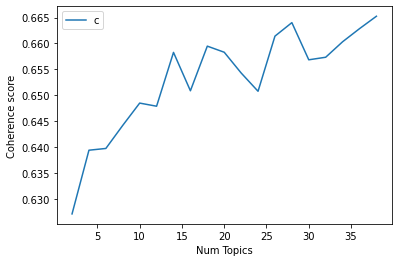

In [ ]:
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x,coherence_values1)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values1):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 4))

Num Topics = 2  has Coherence Value of 0.6271
Num Topics = 4  has Coherence Value of 0.6394
Num Topics = 6  has Coherence Value of 0.6398
Num Topics = 8  has Coherence Value of 0.6442
Num Topics = 10  has Coherence Value of 0.6485
Num Topics = 12  has Coherence Value of 0.6479
Num Topics = 14  has Coherence Value of 0.6583
Num Topics = 16  has Coherence Value of 0.6509
Num Topics = 18  has Coherence Value of 0.6595
Num Topics = 20  has Coherence Value of 0.6583
Num Topics = 22  has Coherence Value of 0.6543
Num Topics = 24  has Coherence Value of 0.6508
Num Topics = 26  has Coherence Value of 0.6614
Num Topics = 28  has Coherence Value of 0.664
Num Topics = 30  has Coherence Value of 0.6568
Num Topics = 32  has Coherence Value of 0.6573
Num Topics = 34  has Coherence Value of 0.6603
Num Topics = 36  has Coherence Value of 0.6628
Num Topics = 38  has Coherence Value of 0.6652


In [ ]:
get_lda_topics(hth_tffit, 38)

Topic 0: 
like ,agency ,directly ,makes ,thrive ,think ,nurture ,research ,transcend ,group ,

Topic 1: 
problems ,especially ,schools ,leaps ,transform ,person ,inequity ,teacher ,supports ,provides ,

Topic 2: 
range ,schools ,opportunities ,health ,complete ,connection ,program ,person ,state ,listen ,

Topic 3: 
able ,anytime ,mindsets ,understanding ,meaning ,identity ,connection ,focus ,directly ,building ,

Topic 4: 
goals ,schools ,value ,belonging ,age ,building ,action ,middle ,equitable ,learning ,

Topic 5: 
supports ,support ,schools ,expectations ,motivation ,learners ,benedict ,guide ,designed ,challenges ,

Topic 6: 
thrive ,supports ,identities ,teacher ,experience ,ways ,critical ,level ,new ,impact ,

Topic 7: 
insights ,timeline ,adult ,schools ,transform ,prepare ,content ,agency ,different ,middle ,

Topic 8: 
age ,leaps ,challenges ,social ,support ,students ,week ,marginalization ,thrive ,schools ,

Topic 9: 
schools ,development ,positive ,important ,identities

## Trans Document

In [ ]:
data2 = trans_sent_df.Sentences.values.tolist()
data_words2 = list(sent_to_words(data2))

In [ ]:
# Create Dictionary
id2word2 = corpora.Dictionary(data_words2)

# Create Corpus: Term Document Frequency
corpus2= [id2word.doc2bow(text) for text in data_words2]

# Build LDA model
lda_model2 = gensim.models.ldamodel.LdaModel(corpus=corpus,
                                           id2word=id2word,
                                           num_topics=18, 
                                           random_state=100,
                                           update_every=1,
                                           chunksize=10,
                                           passes=10,
                                           alpha='symmetric',
                                           iterations=100,
                                           per_word_topics=True)

pprint(lda_model2.print_topics())

[(0,
  '0.000*"formation" + 0.000*"foundational" + 0.000*"dollar" + '
  '0.000*"earmarked" + 0.000*"electives" + 0.000*"equitably" + '
  '0.000*"evolutions" + 0.000*"expansion" + 0.000*"exploring" + '
  '0.000*"extent"'),
 (1,
  '0.000*"formation" + 0.000*"foundational" + 0.000*"dollar" + '
  '0.000*"earmarked" + 0.000*"electives" + 0.000*"equitably" + '
  '0.000*"evolutions" + 0.000*"expansion" + 0.000*"exploring" + '
  '0.000*"extent"'),
 (2,
  '0.000*"formation" + 0.000*"foundational" + 0.000*"dollar" + '
  '0.000*"earmarked" + 0.000*"electives" + 0.000*"equitably" + '
  '0.000*"evolutions" + 0.000*"expansion" + 0.000*"exploring" + '
  '0.000*"extent"'),
 (3,
  '0.000*"formation" + 0.000*"foundational" + 0.000*"dollar" + '
  '0.000*"earmarked" + 0.000*"electives" + 0.000*"equitably" + '
  '0.000*"evolutions" + 0.000*"expansion" + 0.000*"exploring" + '
  '0.000*"extent"'),
 (4,
  '0.077*"education" + 0.045*"language" + 0.044*"english" + 0.037*"els" + '
  '0.033*"disabilities" + 0.031

In [ ]:
model_list2, coherence_values2 = compute_coherence_values(dictionary=id2word2, corpus=corpus2, texts=data_words2, limit=40,start=2, step=2)

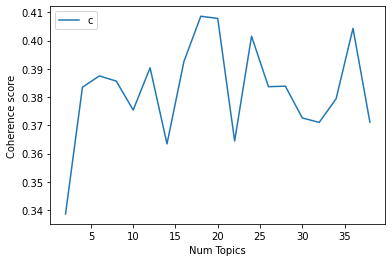

In [ ]:
limit=40; start=2; step=2;
x = range(start, limit, step)
plt.plot(x, coherence_values2)
plt.xlabel("Num Topics")
plt.ylabel("Coherence score")
plt.legend(("coherence_values"), loc='best')
plt.show()

In [ ]:
for m, cv in zip(x, coherence_values2):
    print("Num Topics =", m, " has Coherence Value of", round(cv, 2))

Num Topics = 2  has Coherence Value of 0.34
Num Topics = 4  has Coherence Value of 0.38
Num Topics = 6  has Coherence Value of 0.39
Num Topics = 8  has Coherence Value of 0.39
Num Topics = 10  has Coherence Value of 0.38
Num Topics = 12  has Coherence Value of 0.39
Num Topics = 14  has Coherence Value of 0.36
Num Topics = 16  has Coherence Value of 0.39
Num Topics = 18  has Coherence Value of 0.41
Num Topics = 20  has Coherence Value of 0.41
Num Topics = 22  has Coherence Value of 0.36
Num Topics = 24  has Coherence Value of 0.4
Num Topics = 26  has Coherence Value of 0.38
Num Topics = 28  has Coherence Value of 0.38
Num Topics = 30  has Coherence Value of 0.37
Num Topics = 32  has Coherence Value of 0.37
Num Topics = 34  has Coherence Value of 0.38
Num Topics = 36  has Coherence Value of 0.4
Num Topics = 38  has Coherence Value of 0.37


In [ ]:
get_lda_topics(trans_tffit, 18)

Topic 0: 
like ,directly ,think ,research ,nurture ,makes ,young ,transcend ,st ,understand ,

Topic 1: 
meaning ,great ,long ,academic ,core ,better ,access ,important ,practice ,schools ,

Topic 2: 
online ,anytime ,schools ,areas ,order ,people ,learn ,identities ,questions ,members ,

Topic 3: 
students ,groups ,access ,specific ,leadership ,largely ,enables ,project ,customization ,day ,

Topic 4: 
building ,tackle ,insights ,benedict ,independent ,based ,center ,access ,equity ,staff ,

Topic 5: 
st ,related ,topics ,prepare ,professional ,connection ,career ,able ,success ,benedict ,

Topic 6: 
outside ,students ,learning ,conversation ,designed ,develop ,prepare ,leadership ,thinking ,right ,

Topic 7: 
students ,staff ,schools ,time ,environments ,resources ,career ,questions ,motivation ,health ,

Topic 8: 
leaps ,learn ,school ,impact ,day ,challenges ,young ,designed ,need ,engage ,

Topic 9: 
expectations ,purpose ,truly ,high ,areas ,primer ,career ,positive ,meaning ,ine

# THE END